In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import date
from sklearn import preprocessing
import xgboost as xgb
import pickle

#### load data

In [2]:
# Load Train Data
submission = pd.read_csv('../data/processed/submission.csv',sep=';')

In [3]:
submission.shape

(12897, 35)

In [4]:
# encoder
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../models/canal_le.npy', allow_pickle=True)

In [5]:
submission['canal'] = np.where(submission['canal'].isnull(), 'NAN', submission['canal'])

In [6]:
submission['canal'] = le.transform(submission['canal'].values)

In [7]:
predictors = ['id_pos','canal', 'competidores',
       'ingreso_mediana', 'densidad_poblacional',
       'pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19', 'pct_20a24',
       'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44', 'pct_45a49',
       'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69', 'pct_70a74',
       'pct_75a79', 'pct_80a84', 'pct_85ainf', 'pct_bachelors',
       'pct_doctorados', 'pct_secundario', 'pct_master', 'pct_bicicleta',
       'pct_omnibus', 'pct_subtes', 'pct_taxi', 'pct_caminata',
       'mediana_valor_hogar']

In [8]:
# Select final var of the model
submission = submission[predictors]

#### load model

In [9]:
# Load model
model = pickle.load(open("../models/xgboost_003.pkl", "rb"))

In [10]:
model.get_booster

<bound method XGBModel.get_booster of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1.0, gamma=0.0, gpu_id=0,
       importance_type='gain', learning_rate=0.01, max_bin=16,
       max_delta_step=0, max_depth=7, min_child_weight=2, missing=nan,
       n_estimators=209, n_jobs=1, nthread=None,
       objective='reg:squarederror', random_state=0, reg_alpha=100,
       reg_lambda=1, scale_pos_weight=1, seed=3, silent=None,
       subsample=0.8, tree_method='gpu_hist', verbosity=1)>

In [11]:
y_pred = model.predict(submission)

In [12]:
np.median(y_pred)

12.276659

In [13]:
y_pred_fixed = np.where(y_pred < 0, 0, y_pred)

In [14]:
np.median(y_pred_fixed)

12.276659

In [15]:
submission['unidades_pred'] = np.round(y_pred_fixed)

In [16]:
submission['unidades_pred'] = submission['unidades_pred'].astype(int)

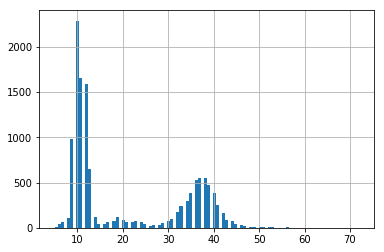

In [18]:
submission['unidades_pred'].hist(bins=100)
pass

In [19]:
submission[['id_pos','unidades_pred']].to_csv('../data/submissions/sub008.csv', sep=',', index=False, header=False)